In [263]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt    #Importing necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd

In [264]:
mnist = keras.datasets.mnist.load_data()     #loading dataset

In [265]:
(X_train,y_train) , (X_test,y_test) = mnist    #splitting the data

In [266]:
len(X_train)     #length of X_train

60000

In [267]:
len(X_test)      #length of X_test

10000

In [268]:
X_train[0].shape     #shape of X_train

(28, 28)

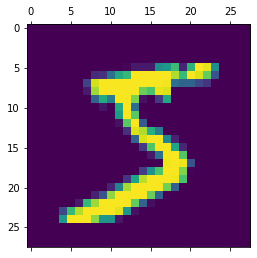

In [269]:
plt.matshow(X_train[0])     #plotting the first value of X_train

In [270]:
y_train[0]      

5

In [271]:
X_train = X_train/255.0
X_test = X_test/255.0         #Scaling the input values between 0 and 1

In [272]:
X_train[0]        #Scaled values of X_train

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [273]:
#Creating the model


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),    
    keras.layers.Dense(10,activation='sigmoid')
])

In [274]:
#Compiling the model


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [275]:
#fitting the model to the train values

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 707us/step - loss: 0.2978 - accuracy: 0.9182
Epoch 2/5
1875/1875 [==============================] - 1s 667us/step - loss: 0.1404 - accuracy: 0.9590
Epoch 3/5
1875/1875 [==============================] - 1s 742us/step - loss: 0.1019 - accuracy: 0.9703
Epoch 4/5
1875/1875 [==============================] - 1s 759us/step - loss: 0.0792 - accuracy: 0.9763
Epoch 5/5
1875/1875 [==============================] - 1s 689us/step - loss: 0.0644 - accuracy: 0.9803


In [276]:
model.evaluate(X_test,y_test)    #Evaluating the performance of the model by passing test values

313/313 [==============================] - 0s 502us/step - loss: 0.0963 - accuracy: 0.9707


[0.0962914526462555, 0.9707000255584717]

In [278]:
y_predicted = model.predict(X_test)    #predicting values for given X_test

In [280]:
y_predicted[0]   #y_predicted values are basically the scores assigned for each number from 0 to 9

array([5.20369781e-07, 1.06553685e-07, 2.34348045e-05, 5.79595566e-04,
       2.28829525e-10, 7.81042786e-08, 8.94672531e-12, 2.99577653e-01,
       5.23047561e-07, 1.16427655e-05], dtype=float32)

In [281]:
np.argmax(y_predicted[0])  #maximum of those scores is the predicted value of the model

7

In [282]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]    #finding the predicted labels by finding the maximum scores for all y_predicted values

In [284]:
y_predicted_labels[:5]  #y_predicted_labels match with true labels below

[7, 2, 1, 0, 4]

In [285]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [286]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)   #creating a confusion matrix

In [290]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    2,    1,    0,    3,    0,    1,    1],
       [   0, 1129,    4,    0,    0,    1,    1,    0,    0,    0],
       [   6,    4, 1007,    4,    1,    0,    0,    4,    6,    0],
       [   1,    0,   10,  994,    0,    0,    0,    3,    2,    0],
       [   2,    0,    6,    1,  963,    0,    3,    1,    0,    6],
       [   3,    2,    1,   47,    1,  820,    9,    1,    5,    3],
       [   5,    4,    4,    1,    2,    2,  938,    0,    2,    0],
       [   1,    9,   10,    3,    1,    0,    0,  998,    0,    6],
       [   4,    3,    8,   21,    7,    1,    5,    5,  914,    6],
       [   3,    3,    0,   10,   11,    1,    1,    6,    1,  973]])>

Text(69.0, 0.5, 'Truth')

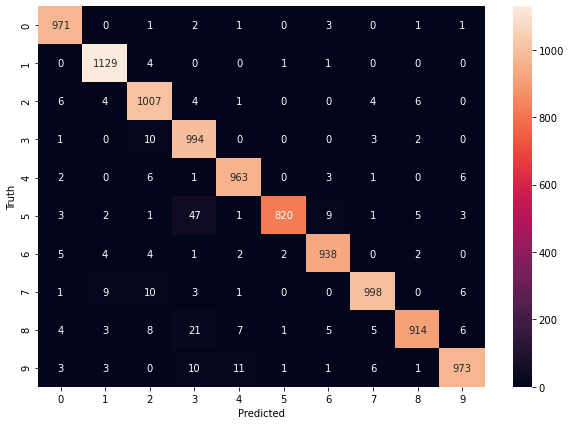

In [301]:
#visual representation of confusion matrix

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix,annot=True,fmt='d')      
plt.xlabel('Predicted')
plt.ylabel('Truth')